In [2]:
import numpy as np
import copy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

import torch
import torch.nn as nn

In [3]:
# device = torch.device("cuda:0")
device = torch.device("cpu")

## 1D regression

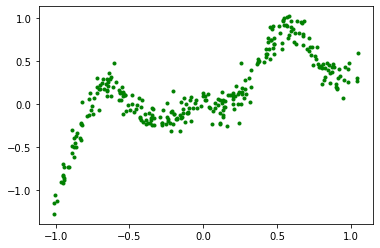

In [4]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = torch.Tensor(x.reshape(-1,1))
yy = torch.Tensor(y.reshape(-1,1))

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [4]:
optimizer = tnn.Adam()
hdt = DecisionNode(1, 1, optimizer)
hdt.create_child(depth=3)

In [5]:
yout = hdt.forward(xx)

In [6]:
xx.shape, yout.shape

((300, 1), (300, 1))

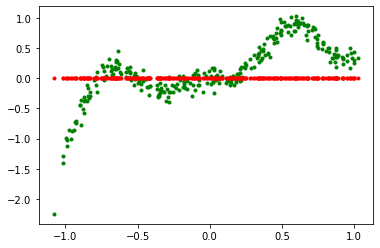

In [7]:
%matplotlib inline

plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), marker='.', color='r')
plt.show()

In [10]:
optimizer = tnn.Adam(0.1)
hdt = DecisionNode(1, 1, optimizer)
hdt.create_child(depth=3)

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(100000):

    yout = hdt.forward(xx)
    dy = yout - yy
    dx = hdt.backward(dy)
    hdt.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')

        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.22165874366041877


100 Error =  0.052105146911429936


200 Error =  0.04739614315275185


300 Error =  0.048164610343285584


400 Error =  0.047682661289811704


500 Error =  0.045818087695180386


600 Error =  0.04659081296322534


700 Error =  0.047292124828914935


800 Error =  0.04238429763373194


900 Error =  0.0404374361879916


1000 Error =  0.03780037193667026


1100 Error =  0.04942451228636657


1200 Error =  0.03812697188859353


1300 Error =  0.03437592909230117


1400 Error =  0.034520801109997265


1500 Error =  0.0343854004975947


1600 Error =  0.034128273398307006


1700 Error =  0.03410004023311885


1800 Error =  0.032620177854984174


1900 Error =  0.03172265939302796


2000 Error =  0.0314135116777389


2100 Error =  0.03158801553343629


2200 Error =  0.030876027499282373


2300 Error =  0.03201672312865246


2400 Error =  0.030845702528842604


2500 Error =  0.030454658261350895


2600 Error =  0.030115793157562482


2700 Error =  0.030101185380193

TclError: invalid command name "."

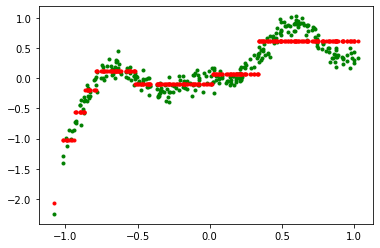

In [11]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

## On 2D dataset

In [48]:
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [12]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

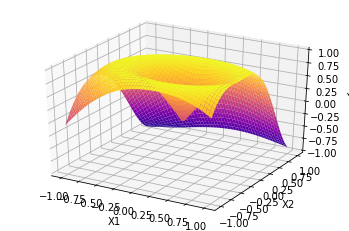

In [13]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [14]:
xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

## Building Decision Tree

In [18]:
optimizer = tnn.Adam()
hdt = DecisionNode(2, 1, optimizer)
hdt.create_child(depth=3)

In [19]:
yout = hdt.forward(xx)

In [20]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
fig.show()

In [21]:
optimizer = tnn.Adam()
hdt = DecisionNode(2, 1, optimizer)
hdt.create_child(depth=3)

%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    yout = hdt.forward(xx)
    dy = yout - yy
    dx = hdt.backward(dy)
    hdt.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5639648664243325


100 Error =  0.09452461599993897


200 Error =  0.06907621453961443


300 Error =  0.06601632075797854


400 Error =  0.06941473949873703


500 Error =  0.07574073941070732


600 Error =  0.08419981670376248


700 Error =  0.07222381043641991


800 Error =  0.05704877492095706


900 Error =  0.05177971366071861


1000 Error =  0.0482854691322804


1100 Error =  0.044547512908670185


1200 Error =  0.043972341816754475


1300 Error =  0.04448046751005902


1400 Error =  0.04237066130568046


1500 Error =  0.04066090744757982


1600 Error =  0.038803195296059516


1700 Error =  0.03953044470999512


1800 Error =  0.04113067314950523


1900 Error =  0.04019655408058928


2000 Error =  0.03954375675558693


2100 Error =  0.039388089758956135


2200 Error =  0.03796320598324084


2300 Error =  0.03666298911388684


2400 Error =  0.0367222922908582


2500 Error =  0.037361778945645734


2600 Error =  0.03829582690385348


2700 Error =  0.03817205996440927


28

TclError: invalid command name "."

In [21]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
fig.show()

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
dtr = DecisionTreeRegressor(max_depth=4)

In [23]:
dtr.fit(xx, yy)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
yout = dtr.predict(xx)

In [25]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
fig.show()